# Three-body problem, universal map and applications

Do you need to get your rocket safely from the moon back to Earth? Do you want to understand the structure of asteroid belts in solar system? Are you afraid that an asteroid or a comet will hit the Earth? Are you fascinated by Saturn's rings? This notebook provides a glimpse into a (restricted) three-body problem with its chaotic behaviour. 

Unlike the two-body problem, which was solved already by Newton, the three-body problem remained an unsurmountable challenge for mathematicians and physicists until the very end of 19th century. The major breakthrough was brought by Poincare, who developed a completely new kind of mathematical/geometrical analysis which hugely expanded our understanding of dynamical systems in general and three-body problem in particular. In fact, Poincare's work on three-body problem is the precise moment when the mathematical notion of chaos is born.

The problem however was not settled until 1950s when Kolmogorov, Arnold and Moser (KAM) developed a detailed mathematical theory of chaos in three-body problem (and way beyond). It is one of the cases when truly beautiful mathematics is tightly connected with such practical matters as launching rockets to the moon.

First, we load some needed packages:

In [2]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

## Possibility of chaos in three-body problem

To simplify matters we will consider the so-called restricted three-body problem. I.e. we assume that third body is sufficiently light, so that it does not perturb the motion of the two larger bodies. An example would be a satellite in the gravitational field of the Earth and the moon. Another example would be the Earth in the field of the Sun and the Jupyter (stability of Earth's trajectory was the original question for Poincare). Saturn with its moons falls in the same universality class at least qualitatively.

This problem is best analyzed in a rotating reference frame where the two heavier bodies are at rest. The derivation of the relevant equations of motion can be found for example in http://jan.ucc.nau.edu/~ns46/student/2010/Frnka_2010.pdf or http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node123.html. Here we just quote the result:
$$
x'' = 2 y' + x -\frac{(1-\mu)(x+\mu)}{p_1^3} - \mu \frac{x-1+\mu}{p_2^3}, \\
y'' = - 2 x' + y - \frac{(1-\mu) y}{p_1^3} - \frac{\mu y}{p_2^3},
$$
where
$$
p_1 = \sqrt{(x+\mu)^2 + y^2}, \\
p_2 = \sqrt{(x-1+\mu)^2 + y^2},
$$
prime denotes differentiation with respect to time and $\mu = \frac{m_2}{m_1 + m_2}$. 

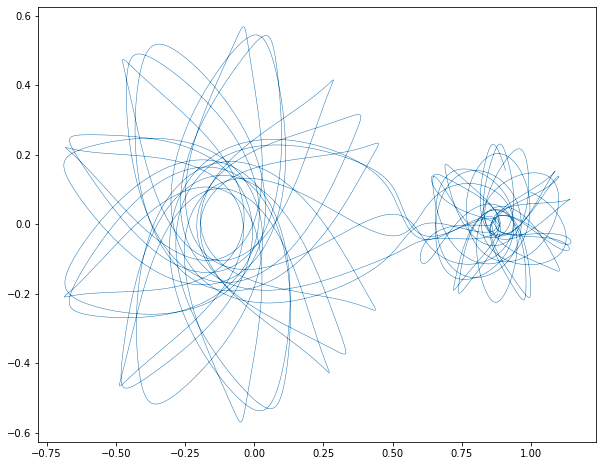

In [7]:
mu = 1/8 # Parameter encoding the ratio of the masses. For moon-Earth system mu = 0.012.

def vectorfield(w,t):
    """
    Defines the differential equations for reduced 3-body problem.

    Arguments:
        w :  vector of dynamical variables :
                  w = [x, v_x, y, v_y]
        t :  time
    """
    x, v_x, y, v_y = w
   
    p1 = np.sqrt((x + mu)**2 + y**2)
    p2 = np.sqrt((x - 1 + mu)**2 + y**2)
    
    f = [v_x,
         2*v_y + x - (1 - mu)*(x+mu)/p1**3 - mu*(x-1+mu)/p2**3,
         v_y,
         -2*v_x + y - (1 - mu)*y/p1**3 - mu*y/p2**3]
    return f

# Next four lines define initial conditions; Play with them to see different possible trajectories
x0 = 0.91   
vx0 = -0.25 
y0 = 0.15   
vy0 = 0.7   

initial_conditions = [x0, vx0, y0, vy0]   # Sets initial conditions

tfinal = 70               # Total length of time interval
number_of_points = 10000    # Number of discretization steps
tspan = np.linspace(1,tfinal, number_of_points)  # Time interval over which we integrate

solution = integrate.odeint(vectorfield, initial_conditions, tspan) # Integration


# Plotting
plt.figure(1,figsize=(10,8))
lines = plt.plot(solution[1:number_of_points,0],solution[1:number_of_points,2])
plt.setp(lines, linewidth=0.5)
plt.show()

As demonstrated first by Poincare, 3-body problem indeed exhibits chaotic behaviour. But how do we know if given initial conditions will lead to chaotic or regular/stable trajectory?

## Poincare sections of universal map

If you want to launch a rocket to the moon you really want to have a good understanding of stable and chaotic orbits. In principle we are dealing with a 4-dimensional phase space which is obviously hard to visualize. A way around it was proposed long time ago and uses what is nowadays called 'Poincare sections'. These are just 2-dimensional hyperplanes in the phase space. Each time a trajectory crosses such a plane we mark ('strobe') the corresponding point on it. Repeating it for many initial conditions will provide a 'map' of initial conditions.

Further simplification is obtained by going from continuous dynamical system, to a discrete map, known as 'universal map', or 'standard map' or 'Chirikov map' (see http://www.scholarpedia.org/article/Chirikov_standard_map for more information). This discrete map is a good approximation for many physical problems including the one at hand. This step dramatically simplifies the problem while keeping all the relevant features intact. At the same time this universal map (as could be guessed from the map) applies much more generally than just to 3-body problem in celestial mechanics. In fact it describes a large class of perturbations of many conservative systems. Universal map is given by
$$
r_{n+1} = r_n + \epsilon \sin(\theta_n), \\
\theta_{n+1} = \theta_{n} + r_{n+1} \mod 2 \pi,
$$
where $\epsilon$ is a measure of non-linearity/perturbation.

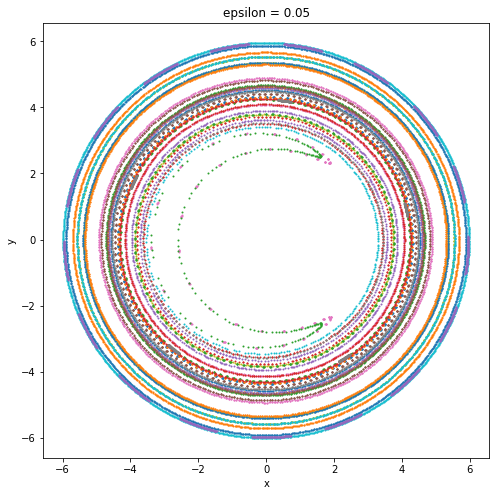

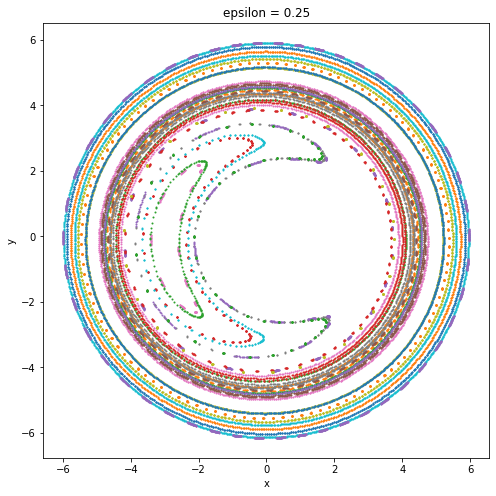

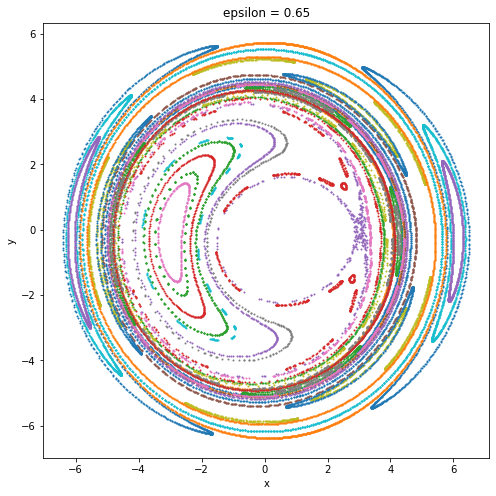

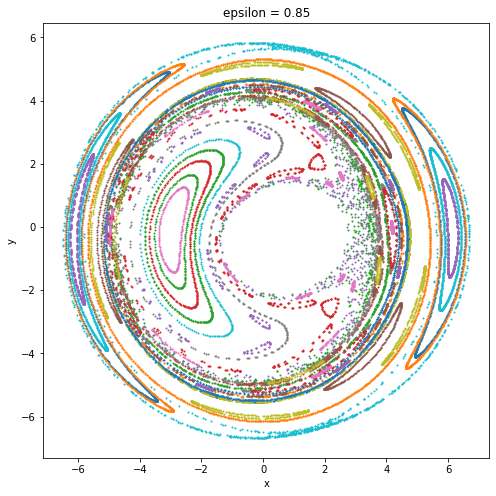

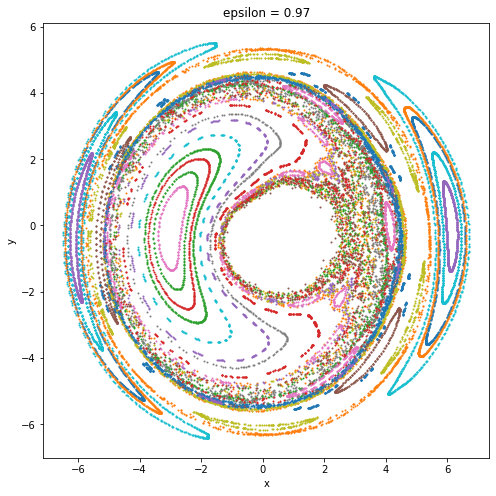

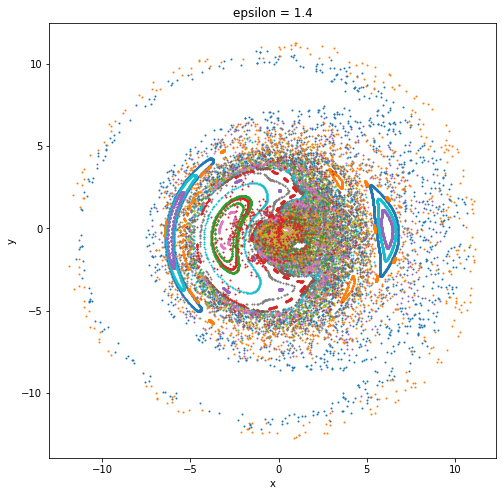

In [170]:
epsilons = [0.05, 0.25, 0.65, 0.85, 0.97, 1.4] # This sets up the perturbation strength. eps = 0 corresponds to unperturbed case

radius = 3

for eps in epsilons:

    np.random.seed(2)
    plt.figure(1, figsize=(8,8))         #creates a figure object

    for number_of_trajectories in range(0,35):

        rlast = radius * np.random.random() # random number between 0 and radius
        thlast = 2 * np.pi * np.random.random()          # random number between 0 and 2*pi

        number_of_points = np.int(500 *rlast)
        rplot = np.zeros(shape=(number_of_points,))
        thetaplot = np.zeros(shape=(number_of_points,))
        x = np.zeros(shape=(number_of_points,))
        y = np.zeros(shape=(number_of_points,))
        for point in range(0, number_of_points):
            rnew = rlast + eps*np.sin(thlast)           # universal map
            thnew = np.mod(thlast+rnew,2*np.pi)         # universal map

            rplot[point] = rnew
            thetaplot[point] = thnew

            rlast = rnew
            thlast = thnew

            x[point] = (rnew + radius)*np.cos(thnew)
            y[point] = (rnew + radius)*np.sin(thnew)

        plt.plot(x,y,'o',ms = 1)                          # 'o' is format string for circle marke; ms = 1 sets marker size

    plt.title('epsilon = '+str(eps))
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

We see that as $\epsilon$ increases more and more of the circular trajectories loose their stability (get destroyed) and chaotic sea(s) starts forming. Eventually chaotic sea dominates the phase space and we are left with the so-called islands of stability. These are known to have fractal boundary. The destruction of stable orbits is one of the subjects of the KAM theory. Number theory enters nicely in the story. The first circular orbit to be destroyed as $\epsilon$ increases corresponds to 1:2 resonance. The last circular orbit to be destroyed (around $\epsilon = 0.97$) corresponds to the golden ratio (which in certain sense is the 'most irrational' number, i.e. it is the number which is hardest to approximate by a fraction of small integers). These details however go well beyond the purpose of this notebook.